In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
import pandas as pd

In [2]:
data = pd.read_csv('normalized_aggregated.csv', header=0, index_col=0)

print(data.columns)

Best1d = 2
for feat in data.columns:
    temp_data = data[feat].values.reshape(-1, 1)
    gmm = GMM(n_components=6, covariance_type='full', n_init=2, init_params='kmeans').fit(temp_data)
    labels = gmm.predict(temp_data)
    sil = metrics.silhouette_score(temp_data, labels, metric='euclidean')
    if sil < Best1d:
        Best1d = sil
        BestName1d = "The SIL score for " + feat + " is " + str(sil)
print(BestName1d)

Best2d = 2
for feat1 in data.columns:
    for feat2 in data.columns:
        if feat1 != feat2:
            temp_data = data[[feat1, feat2]].values.reshape(-1, 1)
            gmm = GMM(n_components=6, covariance_type='full', n_init=2, init_params='kmeans').fit(temp_data)
            labels = gmm.predict(temp_data)
            sil = metrics.silhouette_score(temp_data, labels, metric='euclidean')
            # print("The SIL score for " + feat1 + " and " + feat2 + " is " + str(sil))
            if(sil < Best2d):
                Best2d = sil
                BestName2d = "The SIL score for " + feat1 + " and " + feat2 + " is " + str(sil)

print("Best 2 combo is " + BestName2d)

Best3d = 2
for feat1 in data.columns:
    for feat2 in data.columns:
        for feat3 in data.columns:
            if feat1 != feat2 and feat1 != feat3 and feat3 != feat2:
                temp_data = data[[feat1, feat2, feat3]].values.reshape(-1, 1)
                gmm = GMM(n_components=6, covariance_type='full', n_init=2, init_params='kmeans').fit(temp_data)
                labels = gmm.predict(temp_data)
                sil = metrics.silhouette_score(temp_data, labels, metric='euclidean')
                # print("The SIL score for " + feat1 + " and " + feat2 + " is " + str(sil))
                if(sil < Best3d):
                    Best3d = sil
                    BestName3d = "The SIL score for " + feat1 + " and " + feat2 + " and " + feat3 + " is " + str(sil)
print("Best 3 combo is " + BestName3d)

Index(['Volume', 'Market Cap', 'P/E Ratio', 'vec0', 'vec1', 'vec2', 'vec3',
       'vec4', 'Volatility'],
      dtype='object')
The SIL score for P/E Ratio is 0.4764719593113561
Best 2 combo is The SIL score for Volume and vec0 is 0.474607692854116
Best 3 combo is The SIL score for vec3 and Volatility and vec0 is 0.47970018199739317


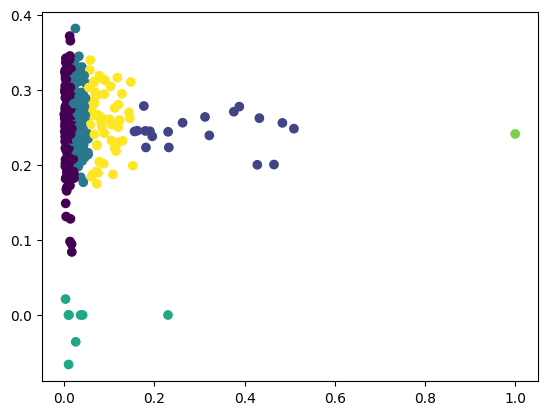

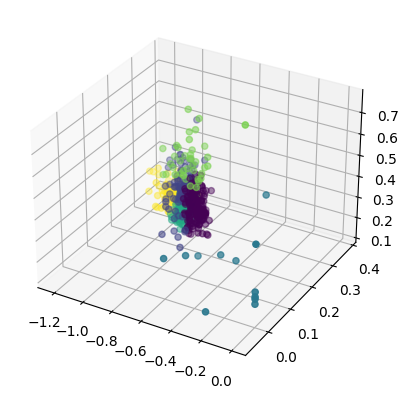

In [3]:
reduced_data_2d = data[["Volume", "vec0"]]
gmm = GMM(n_components=6, covariance_type='full', n_init=2, init_params='kmeans').fit(reduced_data_2d)
labels = gmm.predict(reduced_data_2d)

plt.scatter(reduced_data_2d["Volume"], reduced_data_2d["vec0"], c=labels, cmap='viridis')  # Use the appropriate columns for x and y
plt.show()

reduced_data_3d = data[["vec3", "vec0", "Volatility"]]
gmm = GMM(n_components=6, covariance_type='full', n_init=2, init_params='kmeans').fit(reduced_data_3d)
labels = gmm.predict(reduced_data_3d)

# Scatter plot for 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data_3d["vec3"], reduced_data_3d["vec0"], reduced_data_3d["Volatility"], c=labels, cmap='viridis')
plt.show()